In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
#plots
import seaborn as sns

from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [2]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [4]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_145F.csv
1   3C-EURUSD_FULL_1D_145F_0.0017Sep.csv
2   3C-EURUSD_FULL_1D_145F_0.0018Sep.csv
3   3C-EURUSD_FULL_1D_145F_0.0019Sep.csv
4   3C-EURUSD_FULL_1D_145F_0.0025Sep.csv
5   3C-EURUSD_FULL_1D_145F_0.0028Sep.csv
6   3C-EURUSD_FULL_1D_145F_0.0029Sep.csv
7   3C-EURUSD_FULL_1D_145F_0.002Sep.csv
8   3C-EURUSD_FULL_1D_145F_0.0032Sep.csv
9   3C-EURUSD_FULL_1D_145F_0.0035Sep.csv
10   3C-EURUSD_FULL_1D_145F_0.003Sep.csv
11   3C-EURUSD_FULL_1D_21F.csv
12   3C-EURUSD_FULL_1D_45F.csv
13   3C-EURUSD_FULL_1D_45F_0.0029Sep.csv
14   3C-EURUSD_FULL_1D_70F.csv
15   3C-EURUSD_FULL_1D_70F_0.0029Sep.csv
16   3C-EURUSD_FULL_1H_45F.csv
17   5C-EURUSD_FULL_1D_21F.csv
18   5C-EURUSD_FULL_1D_27F.csv
19   5C-EURUSD_FULL_1D_45F.csv
20   5C-EURUSD_FULL_1D_70F.csv
21   C-EURUSD_FULL_1D_21F.csv
22   C-EURUSD_FULL_1H_25F.csv
23   C-EURUSD_FULL_1H_45F.csv
24   C-EURUSD_FULL_1H_54F.csv


In [5]:
#SELECT an INDEX 
INDX = 7

MODEL_TYPE = 'XGBOOST'
TARGET_NAME = "Class"
ID = '02'

PROFUNDIDAD = 0

TEST_SIZE = .2
VAL_SIZE = .2

In [6]:
base =  os.path.basename(filenames[INDX])
print(base)
FILE_NAME_BASE = os.path.splitext(base)[0]
print(FILE_NAME_BASE)

3C-EURUSD_FULL_1D_145F_0.002Sep.csv
3C-EURUSD_FULL_1D_145F_0.002Sep


In [7]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)

data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000,0.0
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738,1.0
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272,1.0
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484,1.0
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991,-1.0


In [8]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid',
       ...
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao',
       'momentum_kama', 'momentum_roc', 'others_dr', 'others_dlr', 'others_cr',
       'Class'],
      dtype='object', length=145)

In [9]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
data = data.drop(['weekday'], axis = 1)
data = data.drop(['Open_Bid'], axis = 1)
data = data.drop(['High_Bid'], axis = 1)
data = data.drop(['Low_Bid'], axis = 1)
data = data.drop(['Close_Bid'], axis = 1)



#data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,Class
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000,0.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738,1.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272,1.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484,1.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991,-1.0


In [10]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

5137
138


In [11]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 0.0    2101
 1.0    1525
-1.0    1511
Name: Class, dtype: int64


In [12]:
data = data.drop(columns=['Class'])

In [13]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [14]:
data

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.000000,1.257330,0.000000,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.000000,1.257865,0.000000,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.000000,1.260854,0.000000,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.000000,1.265002,0.000000,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.000000,1.268630,0.000000,0.252306,0.251988,1.126991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1.09019,1.09960,1.08970,1.09787,2.219154e+05,2.075363e+05,0.00003,0.007045,0.007631,2.134402e+09,...,53.470734,87.194861,66.181299,-12.805139,0.005839,1.090343,1.224426,0.704464,0.701995,-12.682430
5133,1.09788,1.10311,1.09342,1.10169,3.392159e+05,3.194905e+05,0.00003,0.003479,-0.003565,2.134742e+09,...,60.537067,94.453125,78.650685,-5.546875,0.005649,1.092116,1.806605,0.347946,0.347343,-12.378612
5134,1.10168,1.10937,1.09919,1.10782,2.907155e+05,2.312052e+05,0.00003,0.005564,0.002085,2.135032e+09,...,63.147537,95.134965,92.260984,-4.865035,0.007610,1.095113,2.515176,0.556418,0.554876,-11.891071
5135,1.10780,1.11452,1.10702,1.11071,3.306924e+05,3.730174e+05,0.00035,0.002609,-0.002955,2.135363e+09,...,66.774381,89.705485,93.097858,-10.294515,0.011013,1.097529,2.655317,0.260873,0.260533,-11.661219


In [15]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index([], dtype='object')


In [16]:
pd_old_rows.shape

(0, 0)

In [17]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(5137, 137)

In [18]:
data.head(30)

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.000000,1.257330,0.000000,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.000000,1.257865,0.000000,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.000000,1.260854,0.000000,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.000000,1.265002,0.000000,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.000000,1.268630,0.000000,0.252306,0.251988,1.126991
5,1.27161,1.27417,1.26180,1.26377,1.111343e+06,1.345833e+06,0.00010,-0.006079,-0.008602,4.954033e+06,...,36.724836,49.455081,72.328384,-50.544919,0.001936,1.266511,0.000000,-0.607943,-0.609799,0.512196
6,1.26369,1.27854,1.25590,1.27696,1.115933e+06,1.348588e+06,0.00010,0.010437,0.016516,6.069966e+06,...,51.405206,88.306333,69.995091,-11.693667,0.003342,1.270900,0.000000,1.043703,1.038294,1.561245
7,1.27698,1.28676,1.27034,1.28149,1.066698e+06,1.274568e+06,0.00026,0.003547,-0.006890,7.136664e+06,...,58.689798,86.752137,74.837850,-13.247863,0.004954,1.275085,0.000000,0.354749,0.354121,1.921532
8,1.28279,1.28572,1.28253,1.28477,7.567420e+04,8.780950e+04,0.00010,0.002560,-0.000988,7.212338e+06,...,59.848956,94.997486,90.018652,-5.002514,0.006506,1.278809,0.000000,0.255952,0.255625,2.182402
9,1.28498,1.28971,1.27327,1.27390,1.110720e+06,1.341147e+06,0.00010,-0.008461,-0.011020,8.323059e+06,...,50.366111,63.000234,81.583286,-36.999766,0.006679,1.277300,0.000000,-0.846066,-0.849665,1.317872


In [19]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [20]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,5.597896e+05,0.00010,0.000000,0.000000,4.621817e+05,...,0.000000,76.440177,76.440177,-23.559823,0.0,1.257330,0.0,-0.522913,0.000000,0.000000
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.277971e+06,0.00026,0.000787,0.000787,1.528760e+06,...,25.516102,71.590909,74.015543,-28.409091,0.0,1.257865,0.0,0.078738,0.078707,0.078738
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,8.372040e+04,0.00010,0.003862,0.003075,1.597559e+06,...,36.762821,90.553382,79.528156,-9.446618,0.0,1.260854,0.0,0.386229,0.385485,0.465272
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.353480e+06,0.00010,0.004053,0.000191,2.717248e+06,...,44.645711,95.306214,85.816835,-4.693786,0.0,1.265002,0.0,0.405326,0.404507,0.872484
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.354807e+06,0.00010,0.002523,-0.001530,3.842691e+06,...,41.690793,72.223859,86.027818,-27.776141,0.0,1.268630,0.0,0.252306,0.251988,1.126991


In [21]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volume_Bid', 'Spread',
       'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       ...
       'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
       'momentum_ao', 'momentum_kama', 'momentum_roc', 'others_dr',
       'others_dlr', 'others_cr'],
      dtype='object', length=137)

### SPLIT in 3 Sub Datasets

In [22]:

total = data.shape[0]
print('Total: ', total)

s1 = TEST_SIZE + VAL_SIZE
print('Sum of %s:',s1)
f1 = int(total * s1)
print('count of Val and Test:',f1)
end_train = total - f1
print('end of train: ', end_train)

count_val= int(total * VAL_SIZE)
print('count val: ',count_val)

count_test= int(total * TEST_SIZE)
print('count test: ',count_test)

end_val = end_train + count_val
print('end_val', end_val)


Total:  5137
Sum of %s: 0.4
count of Val and Test: 2054
end of train:  3083
count val:  1027
count test:  1027
end_val 4110


In [23]:
data_training = data.iloc[:end_train]
data_val = data.iloc[end_train: end_val]
data_test = data.iloc[end_val:]

print("data_training.shape: ",data_training.shape)
print("data_val.shape: ", data_val.shape)
print("data_test.shape: ", data_test.shape)

data_training_y = labels[:end_train]
data_val_y = labels[end_train: end_val]
data_test_y = labels[end_val:]

print("data_training_y.shape: ", data_training_y.shape)
print("data_val_y.shape: ", data_val_y.shape)
print("data_test_y.shape: ", data_test_y.shape)

data_training.shape:  (3083, 137)
data_val.shape:  (1027, 137)
data_test.shape:  (1027, 137)
data_training_y.shape:  (3083,)
data_val_y.shape:  (1027,)
data_test_y.shape:  (1027,)


In [24]:
x_train = data_training
x_test = data_val
y_train = data_training_y
y_test = data_val_y

x_rtest = data_test
y_rtest = data_test_y

In [25]:
# Split the data into train / test sets
#x,y = data,labels
#x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, shuffle=False)

In [26]:
print(x_train.shape)
print(x_train)

(3083, 137)
         Open     High      Low    Close        Volume    Volume_Bid   Spread  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05  5.597896e+05  0.00010   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06  1.277971e+06  0.00026   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04  8.372040e+04  0.00010   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06  1.353480e+06  0.00010   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06  1.354807e+06  0.00010   
...       ...      ...      ...      ...           ...           ...      ...   
3078  1.37237  1.37389  1.35757  1.35792  2.895702e+05  2.710845e+05  0.00002   
3079  1.35791  1.35818  1.34802  1.34883  2.513459e+05  2.257901e+05  0.00035   
3080  1.34870  1.34973  1.34870  1.34924  3.052410e+03  3.347650e+03  0.00003   
3081  1.34922  1.35250  1.34427  1.35156  1.657690e+05  1.679159e+05  0.00003   
3082  1.35155  1.35226  1.34493  1.34721  2.309081e+05  2.189670e+05  0.00002   

      Pct_Range

In [27]:
print(x_test.shape)
x_test.reset_index(drop=True, inplace=True)
print(x_test)

print(x_rtest.shape)
x_rtest.reset_index(drop=True, inplace=True)
print(x_rtest)

(1027, 137)
         Open     High      Low    Close       Volume   Volume_Bid   Spread  \
0     1.34722  1.35480  1.34679  1.35178  192986.0000  187872.7813  0.00003   
1     1.35175  1.35295  1.32956  1.34090  297183.3125  286899.2813  0.00003   
2     1.34089  1.34379  1.33179  1.33706  232163.4844  224716.4531  0.00058   
3     1.33577  1.33625  1.33450  1.33466    4142.5801    4146.3799  0.00002   
4     1.33468  1.34167  1.33468  1.34077  153372.9375  150607.0938  0.00002   
...       ...      ...      ...      ...          ...          ...      ...   
1022  1.06292  1.06382  1.06178  1.06191    5538.0098    5510.5098  0.00004   
1023  1.06189  1.06586  1.05922  1.05991  205467.4375  198618.6719  0.00004   
1024  1.05990  1.06335  1.05610  1.05785  220620.4375  220040.6406  0.00003   
1025  1.05785  1.06094  1.05216  1.06034  237565.8438  239541.8438  0.00004   
1026  1.06034  1.06795  1.06001  1.06714  244667.6875  245245.1094  0.00002   

      Pct_Range_Close  Pct_Range_Close_

In [28]:
print(y_test.shape)
print(y_test)

(1027,)
[-1. -1.  0. ...  1.  1. -1.]


In [29]:
# Train the model, this will take a few minutes to run
bst = xgb.XGBClassifier(
    objective='reg:logistic'
)

bst.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# Save the model so we can deploy it
#bst.save_model(source_data_toSave + file_name_toSave)

In [31]:
#bst_loaded = xgb.Booster({'nthread': 4})  # init model
#bst_loaded.load_model(source_data_toSave + file_name_toSave)  # load data

In [32]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.3875365141187926 



In [33]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[0.21262458 0.22894168 0.49809886]
 [0.25913621 0.43412527 0.69961977]
 [0.15282392 0.18142549 0.50570342]]


In [54]:
bst.feature_importances_

feature_important = bst.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
features = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
low_features =  features.loc[features['score'] < 45]
print(low_features)
print(low_features.shape)

                           score
MACD_5_25                     44
momentum_roc                  44
trend_mass_index              44
trend_aroon_ind               43
trend_visual_ichimoku_a       42
AQM_Pct_Range_Close           42
trend_kst                     42
MACDsign_5_25                 41
MA_Close_150                  40
rsi_25                        38
trend_macd                    37
High                          35
MA_Close_200                  34
volatility_bbl                33
volatility_bbh                32
Bollinger_Low                 32
MA_Close_5                    31
MA_Close_25                   31
Low                           30
trend_psar_down               30
momentum_tsi                  30
MA_Close_175                  28
trend_macd_signal             28
trend_visual_ichimoku_b       28
Bollinger_High                22
Close                         20
momentum_rsi                  18
volatility_kcc                16
trend_psar_up                 15
others_dr 

In [53]:
high_features =  features.loc[features['score'] >= 45]
high_features.shape

(77, 1)

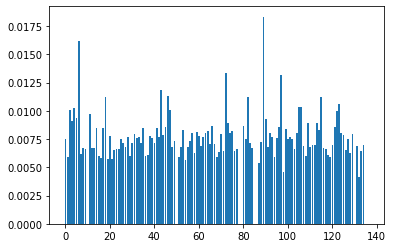

In [34]:

#print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

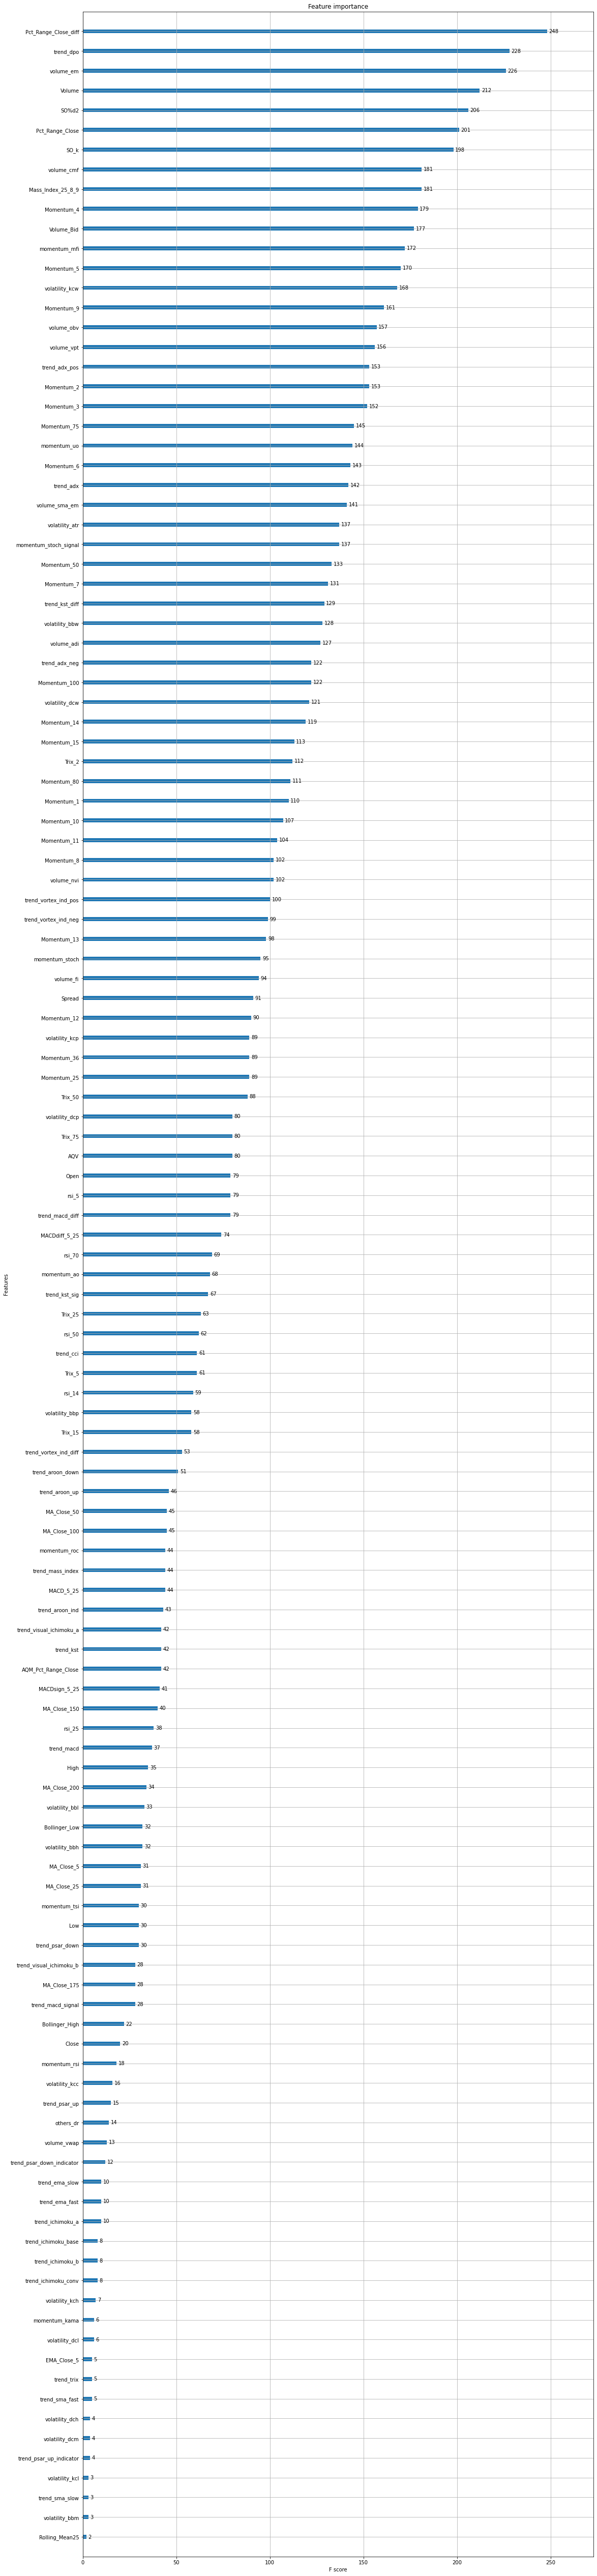

In [35]:
# plot feature importance
ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 92)
pyplot.show()

In [44]:
RUN_THRESHOLD = True

if (RUN_THRESHOLD):
    # define custom class to fix bug in xgboost 1.0.2
    class MyXGBClassifier(XGBClassifier):
        @property
        def coef_(self):
            return None

    # split data into X and y
    x,y = data,labels
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=False)

    # fit model on all training data
    model = MyXGBClassifier()
    model.fit(X_train, y_train)
    # make predictions for test data and evaluate
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # Fit model using each importance as a threshold
    thresholds = sort(model.feature_importances_)
    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        # train model
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_train)
        # eval model
        select_X_test = selection.transform(X_test)
        predictions = selection_model.predict(select_X_test)
        accuracy = accuracy_score(y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.000, n=137, Accuracy: 38.15%
Thresh=0.003, n=126, Accuracy: 38.15%
Thresh=0.005, n=125, Accuracy: 39.33%
Thresh=0.005, n=124, Accuracy: 35.79%
Thresh=0.005, n=123, Accuracy: 36.44%
Thresh=0.005, n=122, Accuracy: 37.50%
Thresh=0.006, n=121, Accuracy: 37.44%
Thresh=0.006, n=120, Accuracy: 39.62%
Thresh=0.006, n=119, Accuracy: 39.33%
Thresh=0.006, n=118, Accuracy: 40.04%
Thresh=0.006, n=117, Accuracy: 38.74%
Thresh=0.006, n=116, Accuracy: 37.74%
Thresh=0.006, n=115, Accuracy: 39.15%
Thresh=0.006, n=114, Accuracy: 37.62%
Thresh=0.006, n=113, Accuracy: 38.38%
Thresh=0.006, n=112, Accuracy: 36

In [8425]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/XGBoost/')
#print('Location to Save: ', source_data)
FILENAME = FILE_NAME_BASE + '__' + str(SIZE) + 'Size_' + MODEL_TYPE + '_' + str(PROFUNDIDAD) + 'Prof_' +  "{:.2f}".format(acc) + 'acc_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.bst'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02
File Name Model: 3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02.bst


In [8426]:
train_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Train.csv')
print(train_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_Train.csv


In [8427]:
test_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_Test.csv')
print(test_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_Test.csv


In [8428]:
rtest_dataset_results_csv = os.path.join(pwd, r'../../../Results/XGBoost/' + FILENAME + '_RealTest.csv')
print(rtest_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_RealTest.csv


### Predict Train Dataset

In [8429]:
y_train_pred = bst.predict(x_train)

In [8430]:
y_train_real = pd.DataFrame({'Real_Class': y_train})
y_train_pred_pd = pd.DataFrame({'Predicted_Class': y_train_pred})
print('y_train_real ',y_train_real.shape)
print('y_train_pred_pd ',y_train_pred_pd.shape)
x_train_real = pd.concat([x_train,y_train_real], axis=1, sort=False)
print('x_train_real ',x_train_real.shape)
x_train = pd.concat([x_train_real,y_train_pred_pd], axis=1, sort=False)
print('x_train ', x_train.shape)

y_train_real  (3441, 1)
y_train_pred_pd  (3083, 1)
x_train_real  (3441, 138)
x_train  (3441, 139)


In [8431]:
#Save
#x_train.to_csv(train_dataset_results_csv, header=True, index=False)
print(train_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_Train.csv


### Predict REAL TEST Dataset

In [8432]:
y_rtest_pred = bst.predict(x_rtest)
#x_train,x_test,y_train,y_test

In [8433]:
y_rtest_real = pd.DataFrame({'Real_Class': y_rtest})
y_rtest_pred_pd = pd.DataFrame({'Predicted_Class': y_rtest_pred})
print('y_rtest_real ',y_rtest_real.shape)
print('y_rtest_pred_pd ',y_rtest_pred_pd.shape)
x_rtest_real = pd.concat([x_rtest,y_rtest_real], axis=1, sort=False)
print('x_rtest_real ',x_rtest_real.shape)
x_rtest = pd.concat([x_rtest_real,y_rtest_pred_pd], axis=1, sort=False)
print('x_rtest ', x_rtest.shape)

y_rtest_real  (1027, 1)
y_rtest_pred_pd  (1027, 1)
x_rtest_real  (1027, 138)
x_rtest  (1027, 139)


In [8434]:
#Save
x_rtest.to_csv(rtest_dataset_results_csv, header=True, index=False)
print(rtest_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_RealTest.csv


### Predict Test Dataset

In [8435]:
x_test.shape
x_test

,Open,High,Low,Close,Volume,Volume_Bid,Spread,Pct_Range_Close,Pct_Range_Close_diff,AQV,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,1.34722,1.35480,1.34679,1.35178,192986.0000,187872.7813,0.00003,0.003392,0.006611,1.692684e+09,...,37.231856,19.241609,15.150739,-80.758391,-0.011240,1.356004,-1.894926,0.339220,0.338646,7.511950
1,1.35175,1.35295,1.32956,1.34090,297183.3125,286899.2813,0.00003,-0.008049,-0.011441,1.692982e+09,...,39.096199,21.101600,15.958625,-78.898400,-0.013380,1.352160,-2.847413,-0.804865,-0.808121,6.646624
2,1.34089,1.34379,1.33179,1.33706,232163.4844,224716.4531,0.00058,-0.002864,0.005185,1.693214e+09,...,44.026649,13.956085,18.099765,-86.043915,-0.015256,1.348222,-3.157209,-0.286375,-0.286786,6.341215
3,1.33577,1.33625,1.33450,1.33466,4142.5801,4146.3799,0.00002,-0.001795,0.001069,1.693218e+09,...,45.914729,9.490138,14.849274,-90.509862,-0.017272,1.344770,-3.320536,-0.179498,-0.179660,6.150334
4,1.33468,1.34167,1.33468,1.34077,153372.9375,150607.0938,0.00002,0.004578,0.006373,1.693371e+09,...,48.964096,21.462761,14.969661,-78.537239,-0.018842,1.344161,-2.759606,0.457794,0.456750,6.636285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1.06292,1.06382,1.06178,1.06191,5538.0098,5510.5098,0.00004,-0.002217,-0.000810,1.925178e+09,...,46.254546,5.065581,12.895393,-94.934419,0.000135,1.064621,-0.918125,-0.221748,-0.221994,-15.542459
1023,1.06189,1.06586,1.05922,1.05991,205467.4375,198618.6719,0.00004,-0.001883,0.000334,1.925383e+09,...,42.485558,2.913851,7.906306,-97.086149,-0.001896,1.063552,-1.016072,-0.188340,-0.188517,-15.701526
1024,1.05990,1.06335,1.05610,1.05785,220620.4375,220040.6406,0.00003,-0.001944,-0.000060,1.925604e+09,...,39.652720,6.529851,4.836428,-93.470149,-0.003642,1.062188,-2.061808,-0.194356,-0.194545,-15.865365
1025,1.05785,1.06094,1.05216,1.06034,237565.8438,239541.8438,0.00004,0.002354,0.004297,1.925842e+09,...,47.777086,26.610280,12.017994,-73.389720,-0.005915,1.061742,-1.505736,0.235383,0.235106,-15.667327


In [8436]:
y_test_pred = bst.predict(x_test)
#x_train,x_test,y_train,y_test

In [8437]:
y_test_pred.shape

(1027,)

In [8438]:
y_test_pred

array([-1.,  0.,  0., ...,  1.,  1.,  1.])

In [8439]:
y_test_real = pd.DataFrame({'Real_Class': y_test})
y_test_pred_pd = pd.DataFrame({'Predicted_Class': y_test_pred})
print('y_test_real ',y_test_real.shape)
print('y_test_pred_pd ',y_test_pred_pd.shape)
x_test_real = pd.concat([x_test,y_test_real], axis=1, sort=False)
print('x_test_real ',x_test_real.shape)
x_test = pd.concat([x_test_real,y_test_pred_pd], axis=1, sort=False)
print('x_test ', x_test.shape)

y_test_real  (1696, 1)
y_test_pred_pd  (1027, 1)
x_test_real  (1696, 138)
x_test  (1696, 139)


In [8440]:

print(x_test['Predicted_Class'].isnull().sum())
#DATASET_FULL.fillna(method='backfill', inplace=True)

669


In [8441]:
#Save
#x_test.to_csv(test_dataset_results_csv, header=True, index=False)
print(test_dataset_results_csv)

C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBOOST_0Prof_0.39acc_Class_02_Test.csv


### XGBoost Results CSV

In [8442]:


data = {'Model_Name':[FILENAME], 'ACC':[acc], 'Profundidad':[PROFUNDIDAD], 'TEST_SIZE':[TEST_SIZE], 'VAL_SIZE':[VAL_SIZE]}

Results = pd.DataFrame(data)
print(Results)

filename = 'XGBoost_Results.csv'
print(filename)
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Results/XGBoost/Results/' + filename)
print(filename_path)

                                          Model_Name       ACC  Profundidad  \
0  3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBO...  0.387537            0   

   TEST_SIZE  VAL_SIZE  
0        0.2       0.2  
XGBoost_Results.csv
C:\Users\maw\Documents\ITESO\forex_prediction\Jupyter Notebooks\IDI4\models_clasification\../../../Results/XGBoost/Results/XGBoost_Results.csv


In [8443]:
Results_loaded = pd.read_csv(filename_path, header=0)

In [8444]:
Results_loaded = Results_loaded.append(Results,ignore_index=True)
print(Results_loaded[-1:])

                                            Model_Name       ACC  Profundidad  \
110  3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBO...  0.387537            0   

     TEST_SIZE  VAL_SIZE  
110        0.2       0.2  


In [8445]:
Results_loaded.to_csv(filename_path, header=True, index=False)

In [8446]:
Results_loaded
Only_high = Results_loaded.loc[Results_loaded['ACC'] > 0.49]
Only_high

,Model_Name,ACC,Profundidad,TEST_SIZE,VAL_SIZE
11,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.493671,11,0.20,0.20
21,3C-EURUSD_FULL_1D_70F_0.0029Sep__5137Size_XGBO...,0.494645,7,0.20,0.20
24,3C-EURUSD_FULL_1D_70F_0.0029Sep__5137Size_XGBO...,0.492697,10,0.20,0.20
40,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.501461,11,0.20,0.20
53,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.501461,10,0.20,0.20
54,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.501461,11,0.20,0.20
77,3C-EURUSD_FULL_1D_145F_0.0028Sep__5137Size_XGB...,0.494805,4,0.15,0.15
80,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.493835,11,0.10,0.30
89,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.501461,10,0.20,0.20
92,3C-EURUSD_FULL_1D_145F_0.003Sep__5137Size_XGBO...,0.490750,4,0.20,0.20


In [8447]:
Only_high

,Model_Name,ACC,Profundidad,TEST_SIZE,VAL_SIZE
0,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.455696,0,0.2,0.2
1,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.456670,1,0.2,0.2
2,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.465433,2,0.2,0.2
3,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.445959,3,0.2,0.2
4,3C-EURUSD_FULL_1D_145F_0.0029Sep__5137Size_XGB...,0.454722,4,0.2,0.2
...,...,...,...,...,...
106,3C-EURUSD_FULL_1D_145F_0.0017Sep__5137Size_XGB...,0.407011,0,0.2,0.2
107,3C-EURUSD_FULL_1D_145F_0.0019Sep__5137Size_XGB...,0.415774,0,0.2,0.2
108,3C-EURUSD_FULL_1D_145F_0.0025Sep__5137Size_XGB...,0.439143,0,0.2,0.2
109,3C-EURUSD_FULL_1D_145F_0.002Sep__5137Size_XGBO...,0.387537,0,0.2,0.2


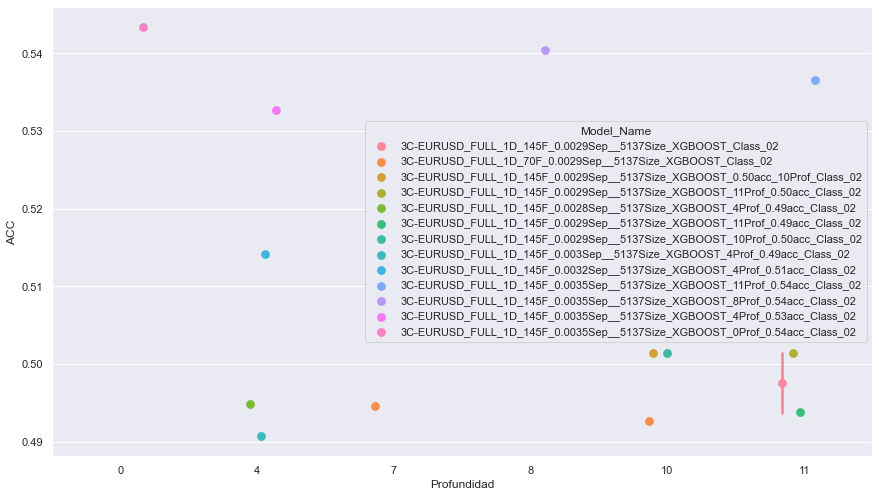

In [8448]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.pointplot(x="Profundidad", y="ACC",  hue="Model_Name", data=Only_high, dodge=True,labelbottom = True,bottom=True);
#sns.swarmplot(x="Profundidad", y="ACC", hue="Model_Name",  data=Results_loaded)

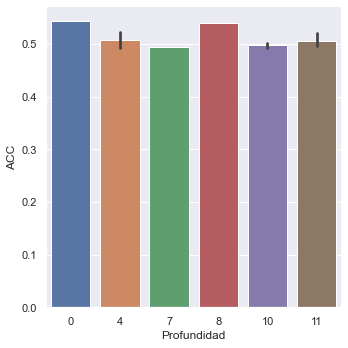

In [8449]:

#print(subset_to_plot)
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.catplot(x="Profundidad", y="ACC",   data=Only_high, kind="bar");

In [8450]:
acc

0.3875365141187926